## MOUNT DRIVE

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## IMPORT LIBRARIES

In [2]:
#data handling
import pandas as pd
import numpy as np

#plotting
import matplotlib.pyplot as plt
import seaborn as sns

#train test split
from sklearn.model_selection import train_test_split
#metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#save and load
import joblib

#sklearn preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer, RobustScaler , StandardScaler
from sklearn.compose import ColumnTransformer

#model
from xgboost import XGBRegressor

#code to display the pipeline
from sklearn import set_config
set_config(display='diagram')

## LOADING DATA

In [3]:
BASE_PATH = '/content/drive/MyDrive/Colab Notebooks/cdcxyhills_2025'

In [4]:
train_df = pd.read_csv(f"{BASE_PATH}/train(1).csv")
test_df = pd.read_csv(f"{BASE_PATH}/test(2).csv")

In [5]:
train_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [6]:
test_df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

* need to change date object ---> datetime

In [8]:
train_df.isnull().sum().sum()

np.int64(0)

In [9]:
test_df.isnull().sum().sum()

np.int64(0)

* no nulls in the train and test data

In [10]:
#check duplicates
train_df.duplicated().any()

np.False_

In [11]:
test_df.duplicated().any()

np.False_

**CHECK IF ANY PROPERTY RESOLD**

In [12]:
print("Rows:", len(train_df))
print("Unique IDs:", train_df["id"].nunique())
print("Duplicate IDs:", len(train_df) - train_df["id"].nunique())

Rows: 16209
Unique IDs: 16110
Duplicate IDs: 99


In [13]:
train_df = train_df.drop_duplicates(subset="id", keep="first").reset_index(drop=True)

print("Rows after dedup:", len(train_df))
print("Unique IDs:", train_df["id"].nunique())

Rows after dedup: 16110
Unique IDs: 16110


In [14]:
#save dedup data
train_df.to_csv(f"{BASE_PATH}/train_dedup.csv", index=False)

In [15]:
train_df.shape

(16110, 21)

In [16]:
# data description
train_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.611000e+04,1.611000e+04,16110.000000,16110.000000,16110.000000,1.611000e+04,16110.000000,16110.000000,16110.000000,16110.000000,16110.000000,16110.000000,16110.000000,16110.000000,16110.000000,16110.000000,16110.000000,16110.000000,16110.000000,16110.000000
mean,4.575462e+09,5.380323e+05,3.368094,2.115115,2075.411421,1.487569e+04,1.500279,0.007014,0.234823,3.408628,7.656797,1786.872998,288.538423,1971.230664,83.001490,98077.902048,47.560692,-122.213899,1984.516636,12739.404283
std,2.875260e+09,3.603598e+05,0.932351,0.765132,907.548014,3.887553e+04,0.543230,0.083460,0.763427,0.651000,1.170048,822.425006,438.865284,29.384455,398.473237,53.339003,0.138435,0.140137,682.117246,26964.164036
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.001000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.472300,-122.328000,1480.000000,5092.000000
50%,3.904940e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.589500e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572600,-122.230000,1840.000000,7615.000000
75%,7.304301e+09,6.400000e+05,4.000000,2.500000,2550.000000,1.063850e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.000000,10058.750000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## EDA

### UNI-variate

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


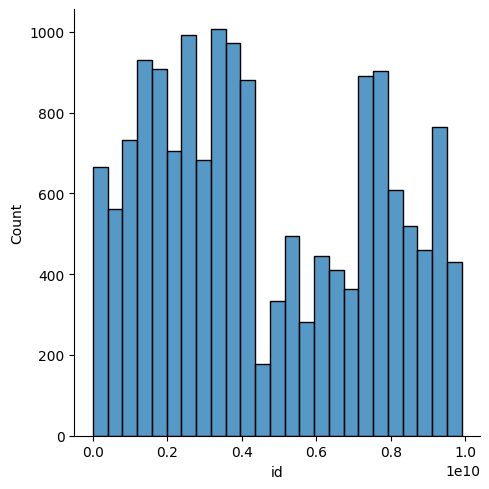

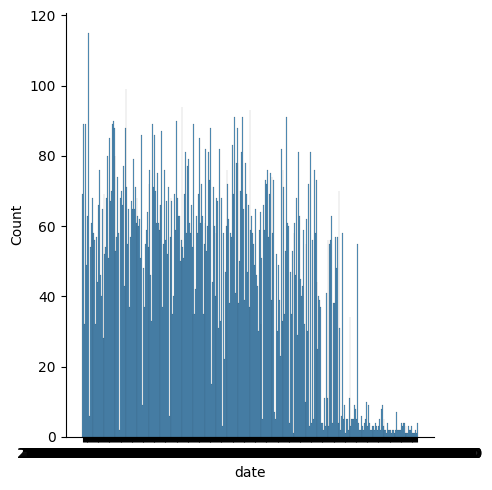

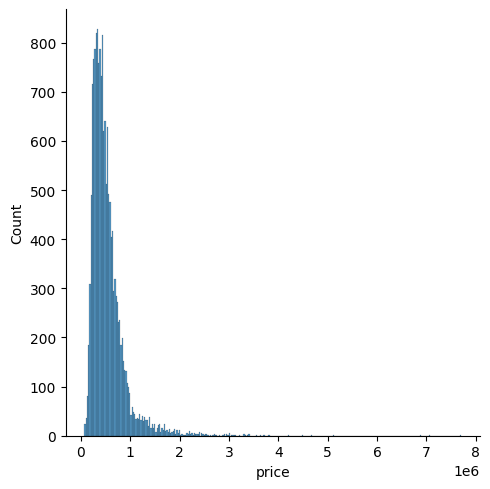

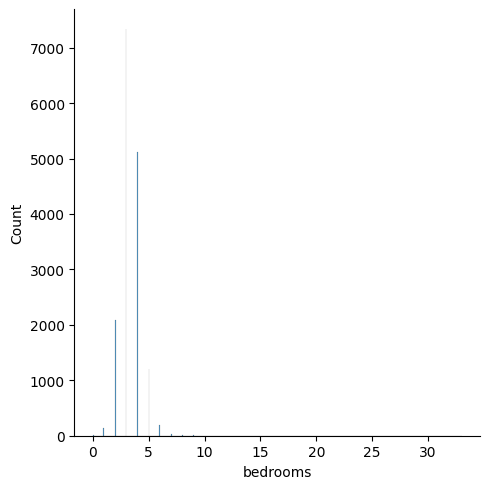

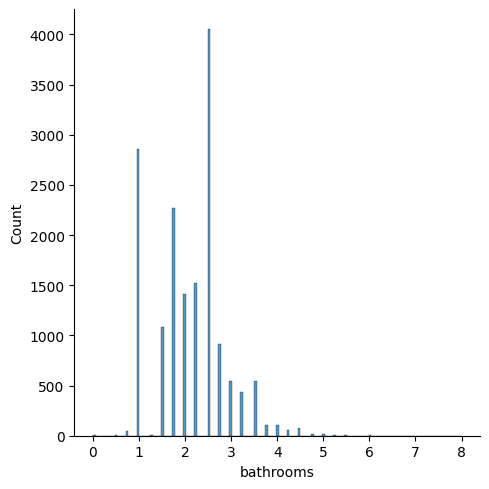

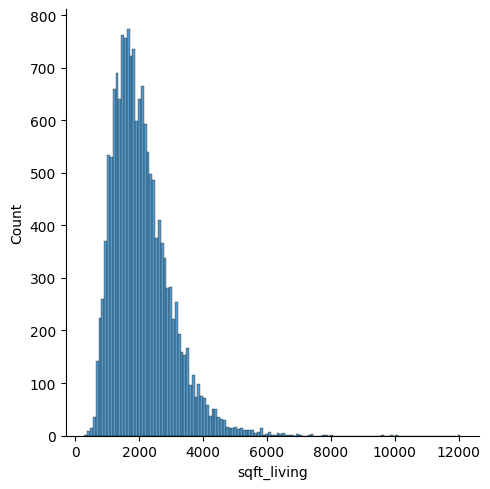

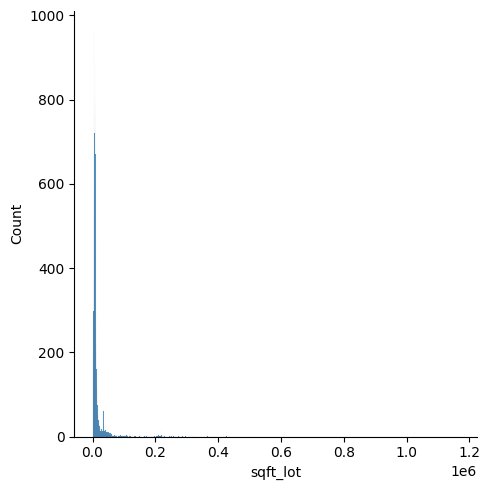

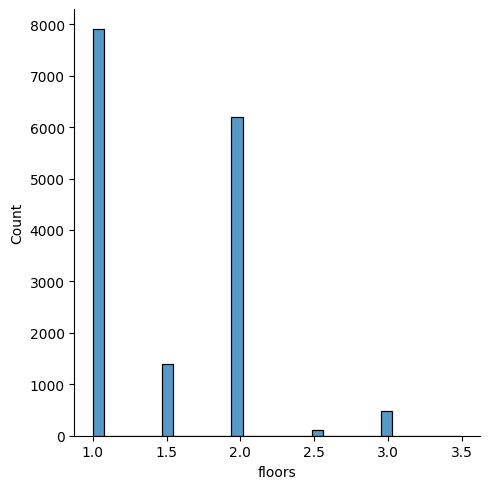

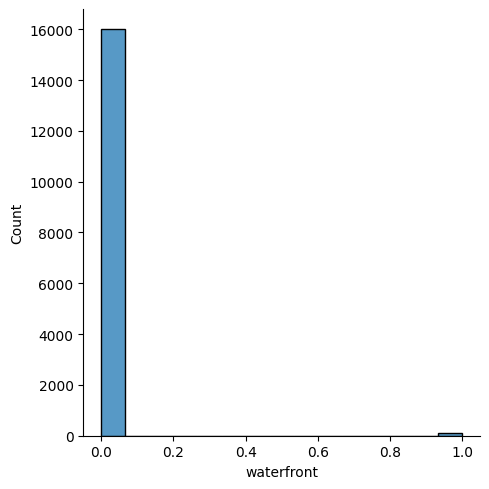

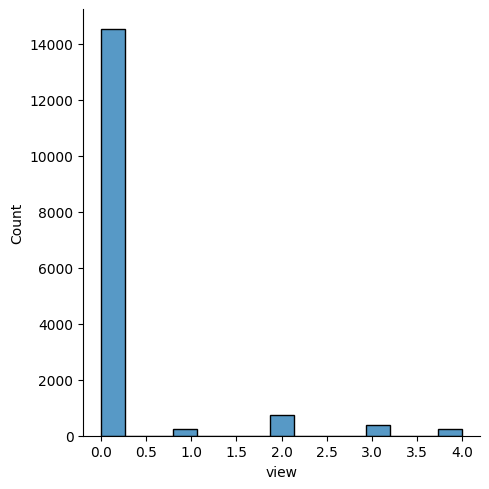

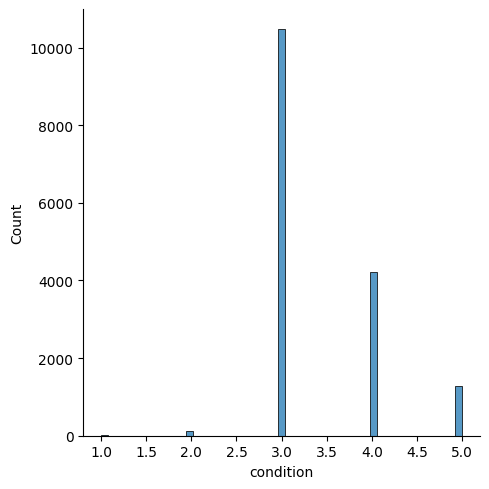

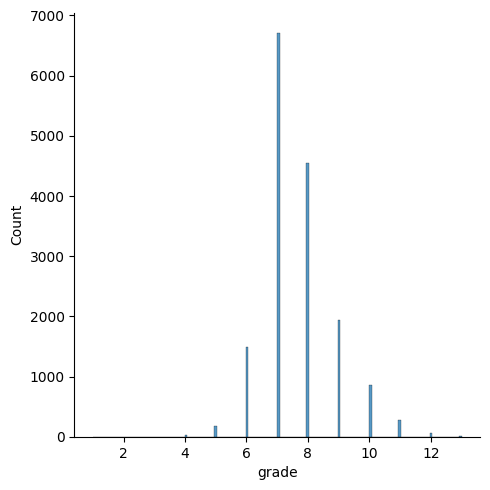

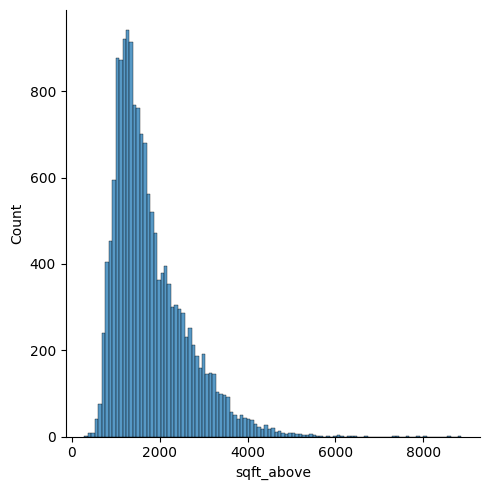

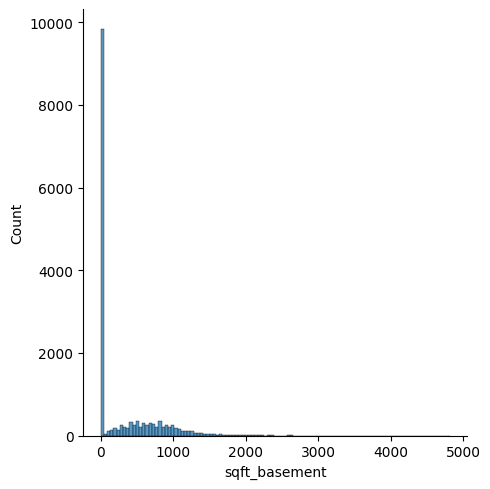

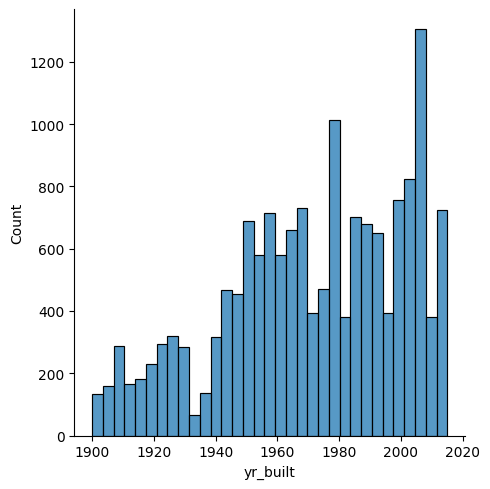

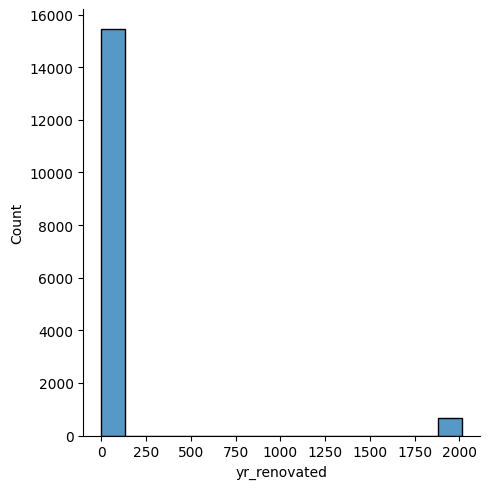

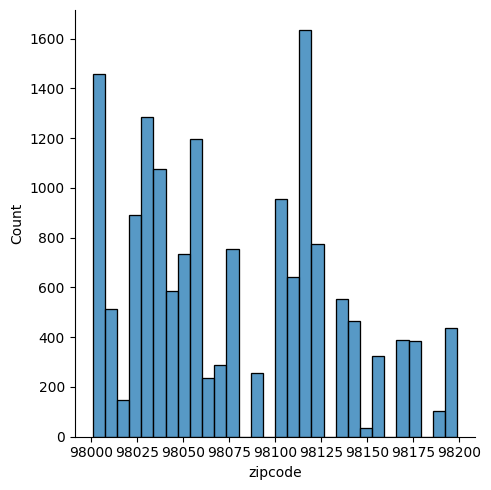

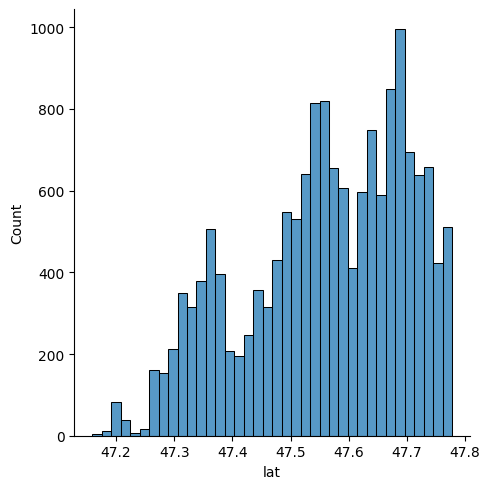

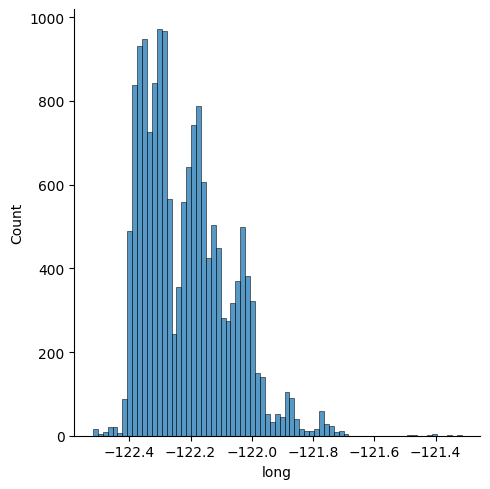

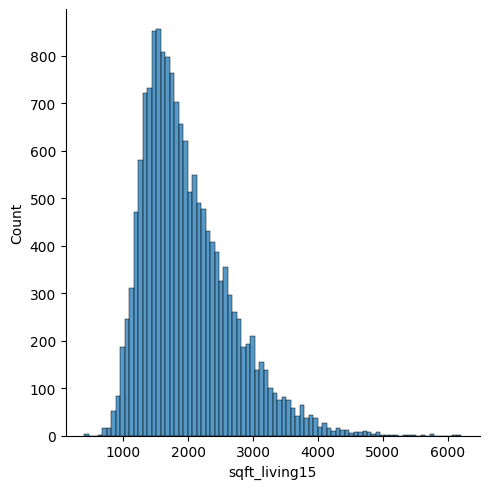

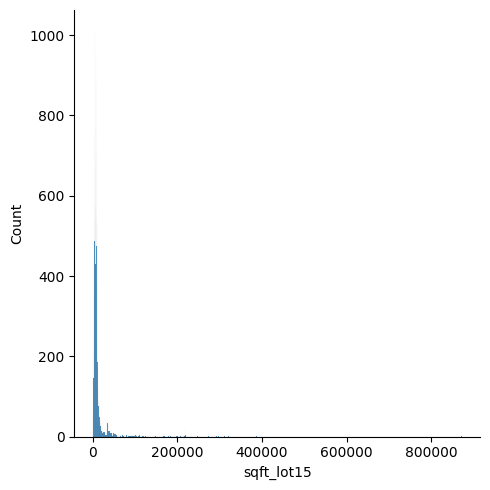

In [17]:
#checkk column distribution
for col in train_df.columns:
    sns.displot(train_df[col])

**OBSERVATION:**

* price , sqft_living,sqft_lot ,sqft_above , sqft_basement , sqft_living15 , sqft_lot15 --> trasform ( log /yeo johnson)

**CHECK OUT-LIERS**

In [18]:
def plot_boxplot(train_df, column):
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=train_df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


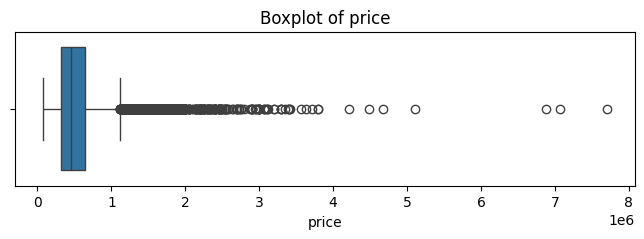

In [19]:
#box plot ( raw data )
plot_boxplot(train_df,'price')

In [20]:
train_df['price'].skew()

np.float64(4.043562128642885)

**CHECK VALUE COUNTS ( DISCRETE DATA )**

In [21]:
train_df['bedrooms'].value_counts().sort_index()

,count
bedrooms,
0,8
1,139
2,2084
3,7331
4,5110
5,1202
6,193
7,26
8,9


* RARE COUNTS OF >6 bedrooms

In [22]:
train_df['bathrooms'].value_counts().sort_index()

,count
bathrooms,
0.00,7
0.50,3
0.75,51
1.00,2858
1.25,8
1.50,1085
1.75,2268
2.00,1413
2.25,1523


In [23]:
train_df['floors'].value_counts().sort_index()

,count
floors,
1.0,7901
1.5,1402
2.0,6199
2.5,117
3.0,487
3.5,4


* very few counts of 3.5

In [24]:
train_df['waterfront'].value_counts().sort_index()

,count
waterfront,
0,15997
1,113


* very imbalanced classes ( binary )

In [25]:
train_df['view'].value_counts().sort_index()

,count
view,
0,14509
1,254
2,742
3,375
4,230


In [26]:
train_df['condition'].value_counts().sort_index()

,count
condition,
1,24
2,126
3,10472
4,4219
5,1269


In [27]:
train_df['grade'].value_counts().sort_index()

,count
grade,
1,1
3,3
4,24
5,177
6,1489
7,6711
8,4550
9,1941
10,857


### BI-variate

**Discrete**

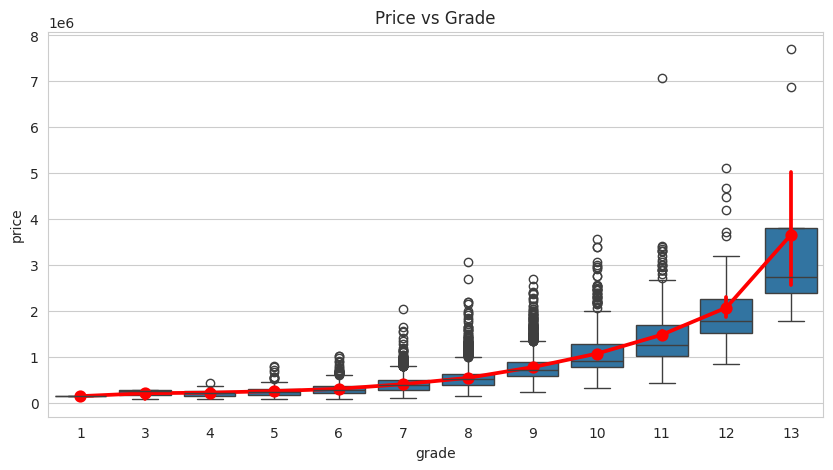

In [28]:
sns.set_style("whitegrid")

plt.figure(figsize=(10,5))
sns.boxplot(data=train_df, x='grade', y='price')
sns.pointplot(data=train_df, x='grade', y='price', color='red')
plt.title("Price vs Grade")
plt.show()


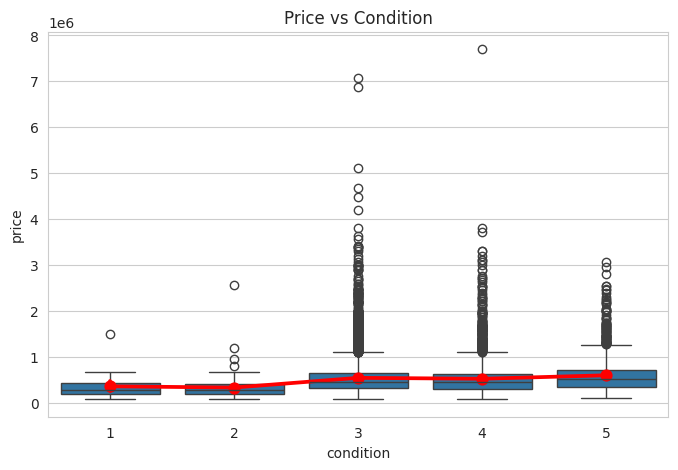

In [29]:
plt.figure(figsize=(8,5))
sns.boxplot(data=train_df, x='condition', y='price')
sns.pointplot(data=train_df, x='condition', y='price', color='red')
plt.title("Price vs Condition")
plt.show()


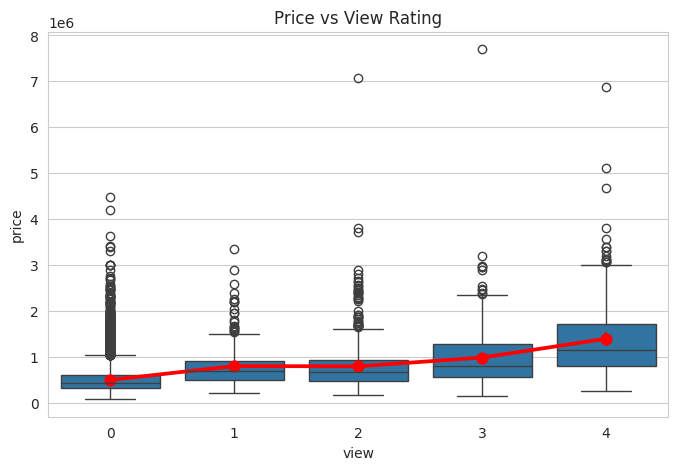

In [30]:
plt.figure(figsize=(8,5))
sns.boxplot(data=train_df, x='view', y='price')
sns.pointplot(data=train_df, x='view', y='price', color='red')
plt.title("Price vs View Rating")
plt.show()


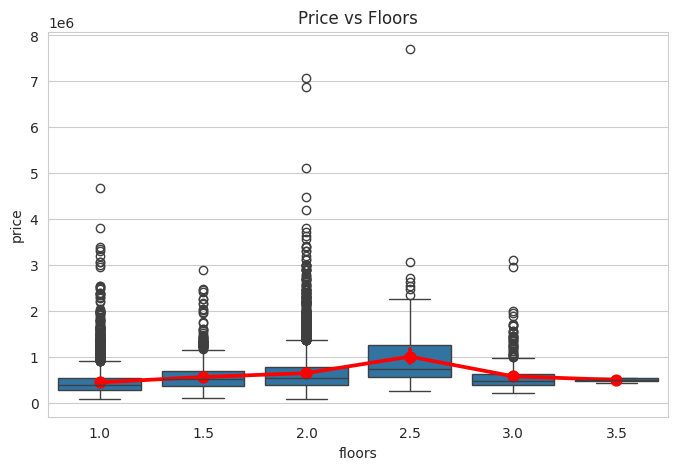

In [31]:
plt.figure(figsize=(8,5))
sns.boxplot(data=train_df, x='floors', y='price')
sns.pointplot(data=train_df, x='floors', y='price', color='red')
plt.title("Price vs Floors")
plt.show()


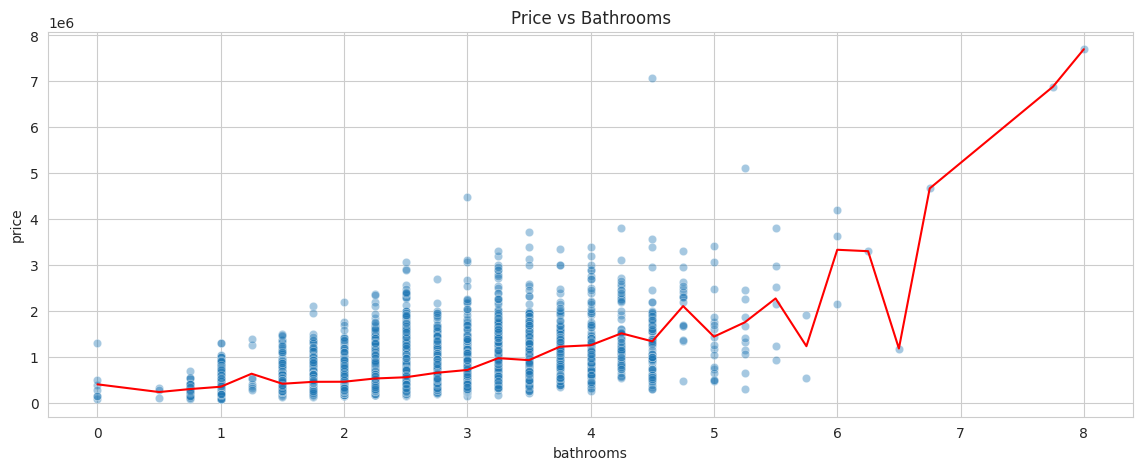

In [32]:
plt.figure(figsize=(14,5))
sns.scatterplot(data=train_df, x='bathrooms', y='price', alpha=0.4)
sns.lineplot(data=train_df.groupby('bathrooms')['price'].mean(), color='red')
plt.title("Price vs Bathrooms")
plt.show()


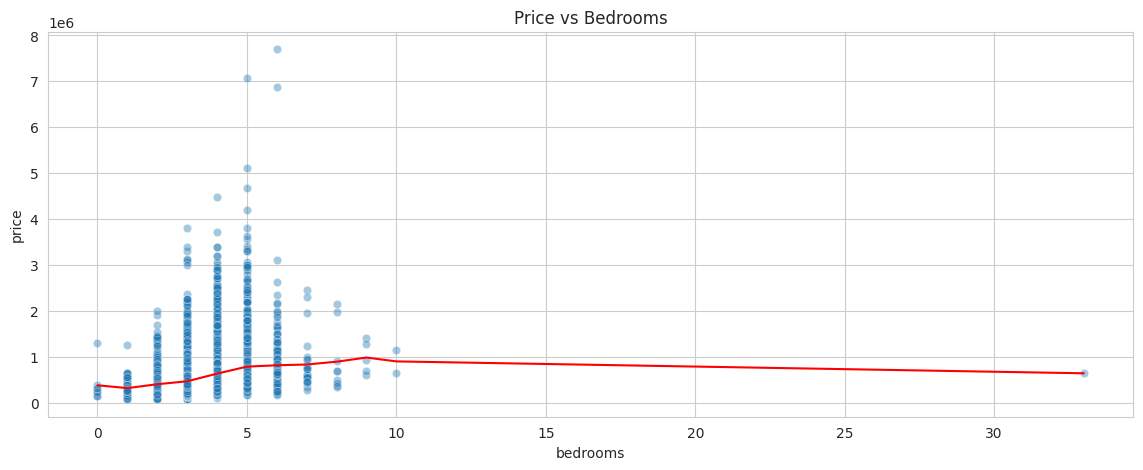

In [33]:
plt.figure(figsize=(14,5))
sns.scatterplot(data=train_df, x='bedrooms', y='price', alpha=0.4)
sns.lineplot(data=train_df.groupby('bedrooms')['price'].mean(), color='red')
plt.title("Price vs Bedrooms")
plt.show()


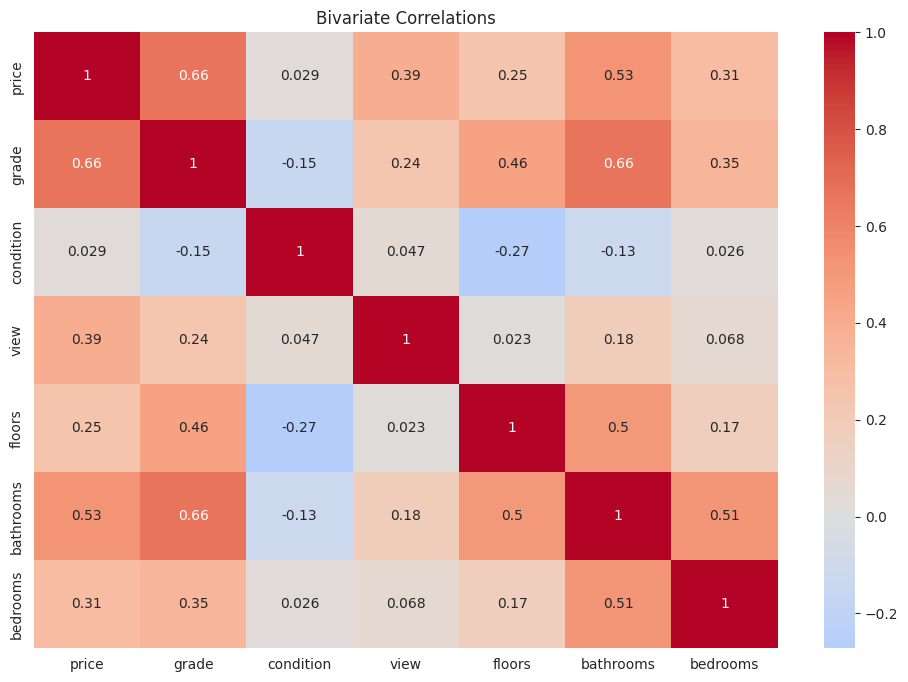

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(train_df[['price','grade','condition','view','floors','bathrooms','bedrooms']].corr(),
            annot=True, cmap="coolwarm", center=0)
plt.title("Bivariate Correlations")
plt.show()


**OBSERVATIONS:**

1. grade has good correlation ( 0.67 ) , and close to normal distribution
2. condition has no affect on price (low corr i.e 0.026)
3. floors --> bucket 3.5 into 3
4. bedrooms --> clip (1,8) and can be added lux flag col (>=6)

**clip floor and bedrooms**

In [35]:
#floors
train_df.loc[train_df['floors'] > 2.5, 'floors'] = 3
train_df['floors'] = train_df['floors'].astype(float)

test_df.loc[test_df['floors'] > 2.5, 'floors'] = 3
test_df['floors'] = test_df['floors'].astype(float)

#bedrooms
train_df['bedrooms'] = train_df['bedrooms'].clip(1, 8)
train_df['is_luxury_bed'] = (train_df['bedrooms'] >= 6).astype(int)

test_df['bedrooms'] = test_df['bedrooms'].clip(1, 8)
test_df['is_luxury_bed'] = (test_df['bedrooms'] >= 6).astype(int)


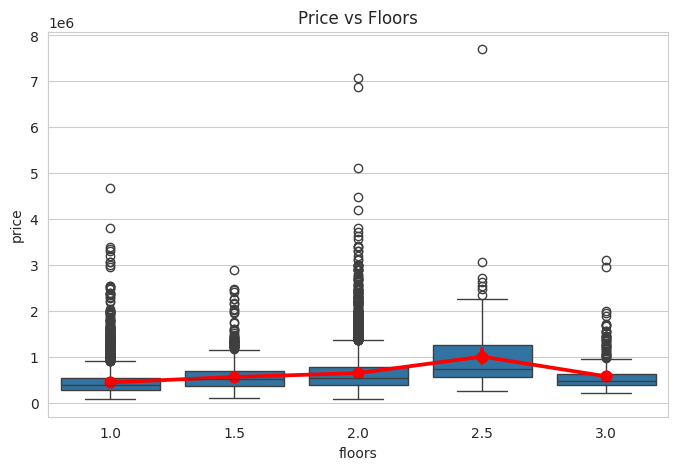

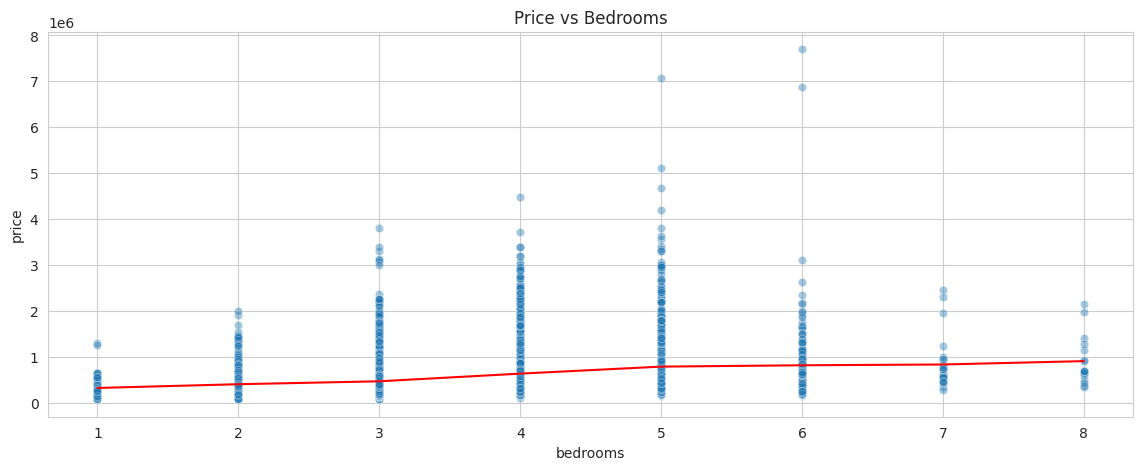

In [36]:
#fixed

plt.figure(figsize=(8,5))
sns.boxplot(data=train_df, x='floors', y='price')
sns.pointplot(data=train_df, x='floors', y='price', color='red')
plt.title("Price vs Floors")
plt.show()

plt.figure(figsize=(14,5))
sns.scatterplot(data=train_df, x='bedrooms', y='price', alpha=0.4)
sns.lineplot(data=train_df.groupby('bedrooms')['price'].mean(), color='red')
plt.title("Price vs Bedrooms")
plt.show()

**Continuos**

In [37]:
#correlation of cols with the target
train_df.corr(numeric_only=True).iloc[:,1]

,price
id,-0.021890
price,1.000000
bedrooms,0.315651
bathrooms,0.525553
sqft_living,0.700803
sqft_lot,0.087354
floors,0.250805
waterfront,0.245810
view,0.390283
condition,0.029359


In [38]:
train_df['date']

,date
0,20150505T000000
1,20140708T000000
2,20150115T000000
3,20150427T000000
4,20141205T000000
...,...
16105,20141113T000000
16106,20141111T000000
16107,20140930T000000
16108,20140620T000000


## FEATURE ENGINEERING

In [39]:
# get house age from built year and sale year
train_df['date'] = pd.to_datetime(train_df['date'])
train_df['sale_year'] = train_df['date'].dt.year
train_df['sale_month'] = train_df['date'].dt.month
train_df['sale_quarter'] = train_df['date'].dt.quarter
train_df['house_age'] = train_df['sale_year']-train_df['yr_built']



test_df['date'] = pd.to_datetime(test_df['date'])
test_df['sale_year'] = test_df['date'].dt.year
test_df['sale_month'] = test_df['date'].dt.month
test_df['sale_quarter'] = test_df['date'].dt.quarter
test_df['house_age'] = test_df['sale_year']-test_df['yr_built']


**Time series analysis**

In [40]:
# copy datetime and price

df=pd.DataFrame()
df['date']=train_df['date'].copy()
df['price']=train_df['price'].copy()

# sort by time
df = df.sort_values("date")

# set date as index
df = df.set_index("date")


In [41]:
yearly_ts = df.resample("YE")["price"].mean()
monthly_ts = df.resample("ME")["price"].mean()
quarterly_ts = df.resample("QE")["price"].mean()

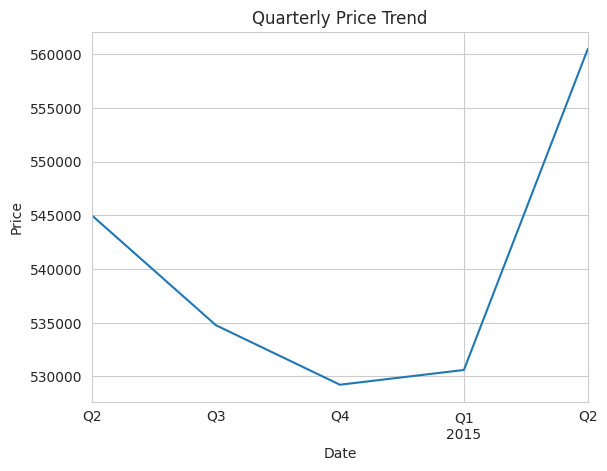

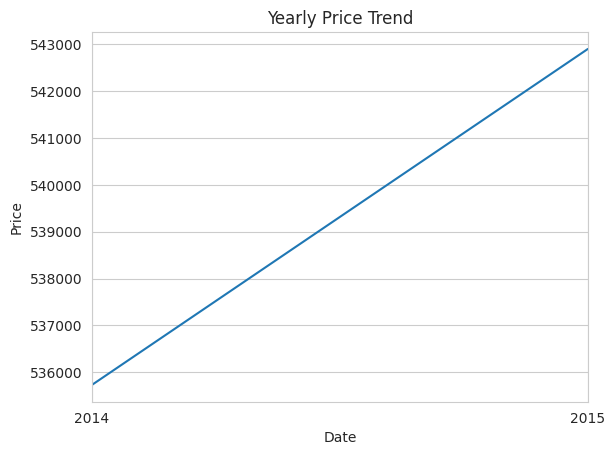

In [42]:
#visualize the trend

#quarterly
plt.figure()
quarterly_ts.plot()
plt.title("Quarterly Price Trend")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

#yearly
plt.figure()
yearly_ts.plot()
plt.title("Yearly Price Trend")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


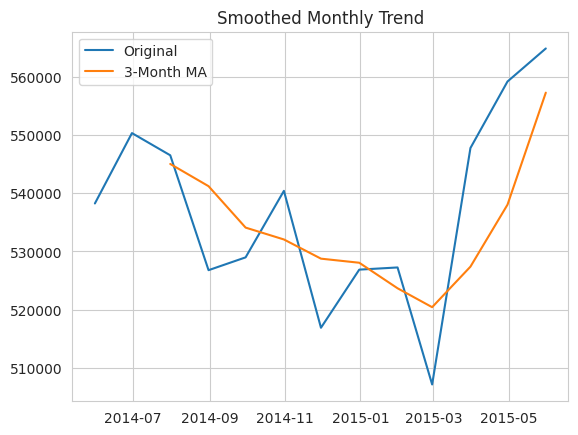

In [43]:

monthly_ts_ma = monthly_ts.rolling(window=3).mean()

plt.figure()
plt.plot(monthly_ts, label="Original")
plt.plot(monthly_ts_ma, label="3-Month MA")
plt.legend()
plt.title("Smoothed Monthly Trend")
plt.show()


**new features**

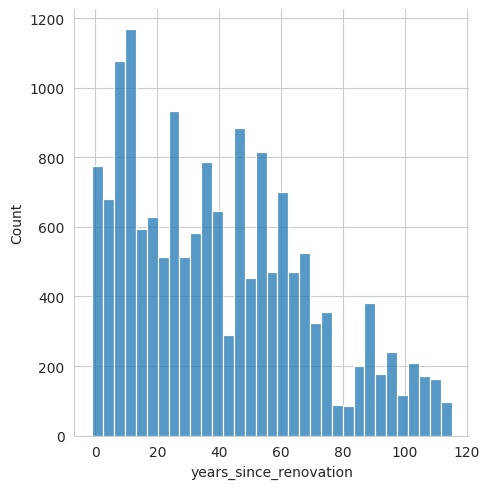

In [44]:
#years since last renovation
train_df['years_since_renovation'] = np.where(
    train_df['yr_renovated'] > 0,
    train_df['sale_year'] - train_df['yr_renovated'],
    train_df['house_age']
)

#renovation flag
train_df['was_renovated'] = (train_df['yr_renovated'] > 0).astype(int)


test_df['years_since_renovation'] = np.where(
    test_df['yr_renovated'] > 0,
    test_df['sale_year'] - test_df['yr_renovated'],
    test_df['house_age']
)
test_df['was_renovated'] = (test_df['yr_renovated'] > 0).astype(int)


#plot
sns.displot(train_df['years_since_renovation'])


<Axes: xlabel='was_renovated'>

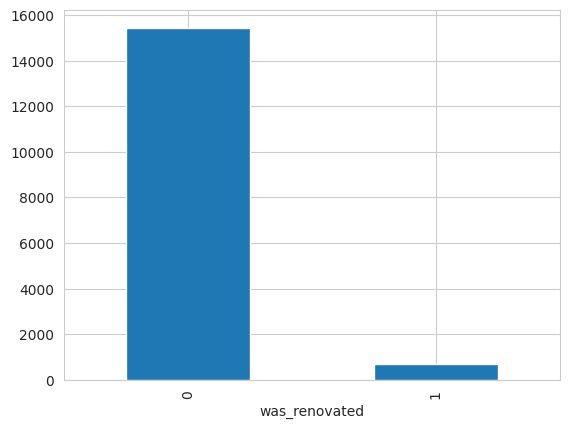

In [45]:
#plot
train_df['was_renovated'].value_counts().plot(kind='bar')

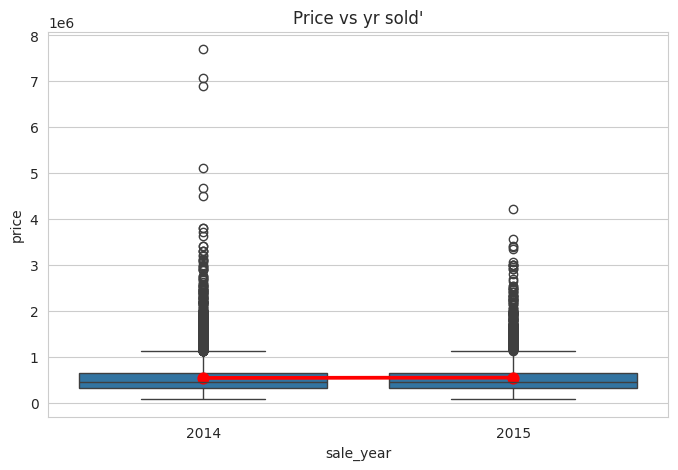

In [ ]:
# sale year
plt.figure(figsize=(8,5))
sns.boxplot(data=train_df, x='sale_year', y='price')
sns.pointplot(data=train_df, x='sale_year', y='price', color='red')
plt.title("Price vs yr sold'")
plt.show()


# house age
plt.figure(figsize=(8,5))
sns.lineplot(data=train_df, x='house_age', y='price', color='red')
plt.title("Price vs house age")
plt.show()


#was renovated
plt.figure(figsize=(8,5))
sns.boxplot(data=train_df, x='was_renovated', y='price')
sns.pointplot(data=train_df, x='was_renovated', y='price', color='red')
plt.title("Price vs renovation")
plt.show()


#year since renovation
plt.figure(figsize=(8,5))
sns.lineplot(data=train_df, x='years_since_renovation', y='price', color='red')
plt.title("Price vs years_since_renovation")
plt.show()


In [46]:
train_df[['price','years_since_renovation','was_renovated','house_age','sale_year']].corr()

,price,years_since_renovation,was_renovated,house_age,sale_year
price,1.000000,-0.102484,0.133531,-0.046662,0.009300
years_since_renovation,-0.102484,1.000000,-0.160702,0.909877,0.020390
was_renovated,0.133531,-0.160702,1.000000,0.228837,-0.023427
house_age,-0.046662,0.909877,0.228837,1.000000,0.009830
sale_year,0.009300,0.020390,-0.023427,0.009830,1.000000


* house age and sale year has very min correlation with price

**NEW**

In [47]:
# Premium View Flag
train_df['is_premium_view'] = (train_df['view'] >= 3).astype(int)

test_df['is_premium_view'] = (test_df['view'] >= 3).astype(int)

In [48]:
#making sale year binary (2014-->0 , 2015-->1)
train_df['sale_year'] = (train_df['sale_year'] == 2015).astype(int)
test_df['sale_year'] = (test_df['sale_year'] == 2015).astype(int)

In [49]:
train_df['sale_year'].value_counts()

,count
sale_year,
0,10936
1,5174


In [50]:
test_df['sale_year'].value_counts()

,count
sale_year,
0,3643
1,1761


In [51]:
#correlation house age and years since renovation
train_df[['house_age','years_since_renovation']].corr()

,house_age,years_since_renovation
house_age,1.000000,0.909877
years_since_renovation,0.909877,1.000000


* house age and yrs since renovation are highly correlated ( use only one of these)

In [52]:
train_df.shape , test_df.shape

((16110, 29), (5404, 28))

**splitting data to avoid leakage (train , val)**

In [53]:

X = train_df.drop(columns=["price"])
y = train_df["price"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [54]:
#log transform the target

y_train_log = np.log1p(y_train)   # log(1 + price)
y_val_log   = np.log1p(y_val)


**ZIPCODE(ranking based on mean price)**

In [55]:
#temporarily add y trian
train_tmp = X_train.copy()
train_tmp["price"] = y_train


# mean price per zipcode
zip_mean = train_tmp.groupby("zipcode")["price"].mean()
# dense rank normalized to [0, 1]
zip_rank = zip_mean.rank(method="dense") / zip_mean.rank(method="dense").max()

#apply on train
X_train["zip_rank"] = X_train["zipcode"].map(zip_rank)
#handle unseen zip
X_train["zip_rank"] = X_train["zip_rank"].fillna(zip_rank.mean())

#apply same zip rank on val
X_val["zip_rank"] = X_val["zipcode"].map(zip_rank)
#unseen
X_val["zip_rank"] = X_val["zip_rank"].fillna(zip_rank.mean())


In [56]:
X_train['zip_rank'].describe()

,zip_rank
count,12888.000000
mean,0.507348
std,0.269745
min,0.014286
25%,0.285714
50%,0.528571
75%,0.742857
max,1.000000


In [57]:
#save ranker for test_df
joblib.dump(zip_rank, f'{BASE_PATH}/zip_rank_mapping.pkl')

['/content/drive/MyDrive/Colab Notebooks/cdcxyhills_2025/zip_rank_mapping.pkl']

In [58]:
#save dataframes
X_train.to_csv(f"{BASE_PATH}/X_train.csv", index=False)
X_val.to_csv(f"{BASE_PATH}/X_val.csv", index=False)

#save row ids for sanity checks in future
np.save(f"{BASE_PATH}/row_ids_train.npy", X_train["id"].values)
np.save(f"{BASE_PATH}/row_ids_val.npy", X_val["id"].values)

**DROP**

In [59]:
X_train.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_lot15,is_luxury_bed,sale_year,sale_month,sale_quarter,house_age,years_since_renovation,was_renovated,is_premium_view,zip_rank
15596,7934000090,2015-02-25,2,1.00,690,5200,1.0,0,0,3,...,5700,0,1,2,1,97,97,0,0,0.557143
8253,4310700570,2014-12-10,2,1.00,920,5000,1.0,0,0,4,...,5000,0,0,12,4,65,65,0,0,0.628571
2943,7504060020,2015-01-22,4,2.25,2520,10370,2.0,0,0,3,...,12682,0,1,1,1,35,35,0,0,0.814286
1332,8910500150,2014-05-29,3,1.50,1460,5040,1.0,0,0,3,...,7560,0,0,5,2,43,43,0,0,0.314286
15068,1925059049,2014-07-21,3,1.00,1175,10454,1.0,0,0,4,...,10800,0,0,7,3,65,65,0,0,0.985714


In [60]:
X_val.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_lot15,is_luxury_bed,sale_year,sale_month,sale_quarter,house_age,years_since_renovation,was_renovated,is_premium_view,zip_rank
387,5700002325,2014-06-05,3,1.75,2340,4206,1.0,0,0,5,...,4725,0,0,6,2,97,97,0,0,0.571429
5155,2997800090,2015-04-06,3,1.00,1220,5652,1.0,0,0,3,...,2467,0,1,4,2,110,110,0,0,0.700000
8139,268500020,2014-11-06,4,1.00,1650,9750,1.0,0,0,4,...,10112,0,0,11,4,50,50,0,0,0.514286
2405,7334500090,2015-01-20,3,2.00,1810,11456,1.0,0,0,3,...,12931,0,1,1,1,45,45,0,0,0.428571
9529,1721800470,2014-05-21,5,2.00,1930,6120,1.5,0,0,3,...,6120,0,0,5,2,73,45,1,0,0.285714


In [61]:
X_train.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'is_luxury_bed', 'sale_year',
       'sale_month', 'sale_quarter', 'house_age', 'years_since_renovation',
       'was_renovated', 'is_premium_view', 'zip_rank'],
      dtype='object')

In [62]:
X_val.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'is_luxury_bed', 'sale_year',
       'sale_month', 'sale_quarter', 'house_age', 'years_since_renovation',
       'was_renovated', 'is_premium_view', 'zip_rank'],
      dtype='object')

In [63]:
#data shape
X_train.shape , X_val.shape ,y_train_log.shape , y_val_log.shape

((12888, 29), (3222, 29), (12888,), (3222,))

In [64]:
cols_to_be_dropped = ['id','date','yr_built','yr_renovated','zipcode','years_since_renovation'] #6 cols

## SCALING AND TRANSFORMING

**PREPROCESSING PIPELINE**

In [65]:
#Columns to preprocess
scale_only_cols = [
    'bedrooms', 'bathrooms', 'floors',
    'condition', 'grade',
    'lat', 'long',
    'house_age','sale_month','sale_quarter'
]  #10 cols

skew_cols = [
    'sqft_lot', 'sqft_lot15',
    'sqft_living', 'sqft_living15',
    'sqft_above', 'sqft_basement',
    'view'
]  #7 cols

binary_cols = [
    'waterfront',
    'was_renovated',
    'is_luxury_bed',
    'is_premium_view',
    'sale_year'
]  #5

scale_not = ['zip_rank'] #scaling not required

#total = drop(6)+10+7+5+1 = 29

In [66]:
#skew pipeline

skew_pipeline = Pipeline(steps=[
    ('yeo_johnson', PowerTransformer(method='yeo-johnson')),
    ('scaler', RobustScaler())
])


In [67]:
#scale only pipeline

scale_only_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

In [68]:
#full preprocessing columntransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('skew', skew_pipeline, skew_cols),
        ('scale', scale_only_pipeline, scale_only_cols),
        ('binary', 'passthrough', binary_cols+scale_not)
    ],
    remainder='drop'
)

In [69]:
#Apply processor to train data
X_train_processed = preprocessor.fit_transform(X_train)

In [70]:
#transform validation data
X_val_processed = preprocessor.transform(X_val)

In [71]:
#transform test data

#apply zip rank mapping
test_df["zip_rank"] = test_df["zipcode"].map(zip_rank)
#unseen
test_df["zip_rank"] = test_df["zip_rank"].fillna(zip_rank.mean())

#store test data row ids for sanity check
test_row_ids = test_df["id"].values
np.save(f"{BASE_PATH}/test_df_row_ids.npy", test_row_ids)

#apply preprocessor
test_processed = preprocessor.transform(test_df)

In [72]:
#get feature names out
feature_names = preprocessor.get_feature_names_out()

In [73]:
feature_names

array(['skew__sqft_lot', 'skew__sqft_lot15', 'skew__sqft_living',
       'skew__sqft_living15', 'skew__sqft_above', 'skew__sqft_basement',
       'skew__view', 'scale__bedrooms', 'scale__bathrooms',
       'scale__floors', 'scale__condition', 'scale__grade', 'scale__lat',
       'scale__long', 'scale__house_age', 'scale__sale_month',
       'scale__sale_quarter', 'binary__waterfront',
       'binary__was_renovated', 'binary__is_luxury_bed',
       'binary__is_premium_view', 'binary__sale_year', 'binary__zip_rank'],
      dtype=object)

### Save Artifacts and processed data to drive

In [74]:
#check if data is sparse
from scipy import sparse
sparse.issparse(X_train_processed)
sparse.issparse(X_val_processed)

False

In [75]:
#check test
sparse.issparse(test_processed)

False

In [76]:
#train data
np.save(f"{BASE_PATH}/X_train_processed_tab.npy", X_train_processed)
np.save(f"{BASE_PATH}/X_val_processed_tab.npy", X_val_processed)
np.save(f"{BASE_PATH}/y_train_log_tab.npy", y_train_log.values)
np.save(f"{BASE_PATH}/y_val_log_tab.npy", y_val_log.values)

#save processed test data
np.save(f"{BASE_PATH}/test_processed_tab.npy", test_processed)

# Save feature names
np.save(f"{BASE_PATH}/feature_names.npy", feature_names)

#preprocessor
joblib.dump(preprocessor, f"{BASE_PATH}/preprocessor.pkl")


['/content/drive/MyDrive/Colab Notebooks/cdcxyhills_2025/preprocessor.pkl']

## DEMO - for new notebook

In [77]:
#base dir --> BASE_PATH

#load the data from saved files
X_train_processed = np.load(f"{BASE_PATH}/X_train_processed_tab.npy")
X_val_processed = np.load(f"{BASE_PATH}/X_val_processed_tab.npy")
y_train_log = np.load(f"{BASE_PATH}/y_train_log_tab.npy")
y_val_log = np.load(f"{BASE_PATH}/y_val_log_tab.npy")

In [78]:
#xgb base model for checking

xgb_base= XGBRegressor(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)


In [79]:
#fit on train set
xgb_base.fit(X_train_processed, y_train_log)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [80]:
#predict on validation set
log_y_val_pred = xgb_base.predict(X_val_processed)

In [81]:
#back transform logs
#pred val
y_val_pred = np.expm1(log_y_val_pred)

#true val
y_val = np.expm1(y_val_log)

In [82]:
#evaluate
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_val_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

MSE: 11198616893.787054
RMSE: 105823.51767819408
R-squared: 0.908389451230767


### CHECK FEATURE IMP

In [83]:
importances = xgb_base.feature_importances_
feature_names = preprocessor.get_feature_names_out()

fi = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)


In [84]:
fi

,feature,importance
22,binary__zip_rank,0.291089
11,scale__grade,0.259169
2,skew__sqft_living,0.122268
17,binary__waterfront,0.054764
20,binary__is_premium_view,0.053076
6,skew__view,0.047284
12,scale__lat,0.037212
13,scale__long,0.015486
21,binary__sale_year,0.013572
10,scale__condition,0.012493


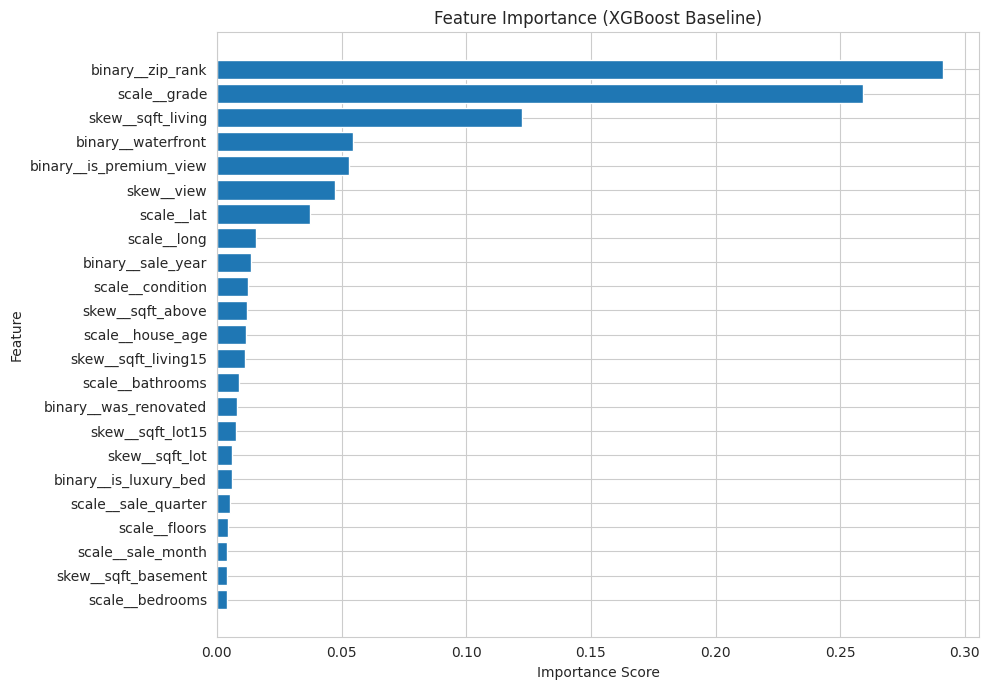

In [85]:
plt.figure(figsize=(10, 7))
plt.barh(
    fi['feature'],
    fi['importance']
)
plt.gca().invert_yaxis()  # Most important at top

plt.title('Feature Importance (XGBoost Baseline)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')

plt.tight_layout()
plt.show()


**OBSERVATION**

| Rank | Feature | Importance | Interpretation |
|------|---------|------------|----------------|
| 1 |   zip_rank | 0.29	 | Location dominates
| 2 | grade	|0.25	|Construction / finish quality
| 3 | sqft_living|	0.12 |	Size still matters
| 4 |   lat | 	0.04 | secondary performer
| 5 | view	|0.04	| secondary performer
| 6 | is_premium_view|0.05 |	secondary performer
| 7 |   waterfront | 	0.05 | secondary performer

* month , basement , scale__floors,scale__bedrooms performed very poor

In [86]:
# get requirements
!pip freeze > requirements.txt

#save
import shutil
shutil.copy('requirements.txt', f'{BASE_PATH}/preprocess_notebook_requirements.txt')

'/content/drive/MyDrive/Colab Notebooks/cdcxyhills_2025/preprocess_notebook_requirements.txt'

In [87]:
!ls /content/drive/MyDrive/'Colab Notebooks'/cdcxyhills_2025/

 feature_names.npy		       'train(1).csv'
 images				        train_dedup.csv
 preprocess_notebook_requirements.txt   X_train.csv
 preprocessor.pkl		        X_train_processed_tab.npy
 row_ids_train.npy		        X_val.csv
 row_ids_val.npy		        X_val_processed_tab.npy
'test(2).csv'			        y_train_log_tab.npy
 test_df_row_ids.npy		        y_val_log_tab.npy
 test_processed_tab.npy		        zip_rank_mapping.pkl
